In [3]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.4 MB/s eta 0:00:00


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.2 MB/s eta 0:00:00


In [5]:
!pip install cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113624 sha256=4519e7af671130b013b4793fde98a4068be5ab0c538369ad733e38a109af2d66
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [6]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979746 sha256=98eb6d0326903f393e9212e7d311408a016e4b92fd960b9d206a5a2a3de41839
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [7]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cartopy
import cartopy.crs as ccrs                   
import cartopy.feature as cfeature           
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [8]:
root = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(root)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [9]:
#Creamos la proyeccion
P = pyproj.Proj(proj='utm', zone=15, ellps='WGS84', preserve_units=True)

In [10]:
#Convertimos las cordenadas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,2.741742e+06,831618.824330
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,2.741383e+06,832012.634456
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,2.743015e+06,833355.201667
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,2.743140e+06,830672.463351
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2.741498e+06,830536.967666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,2.742113e+06,831235.339511
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2.741668e+06,830350.089419
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,2.741571e+06,833420.080181
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,2.742465e+06,829895.289246


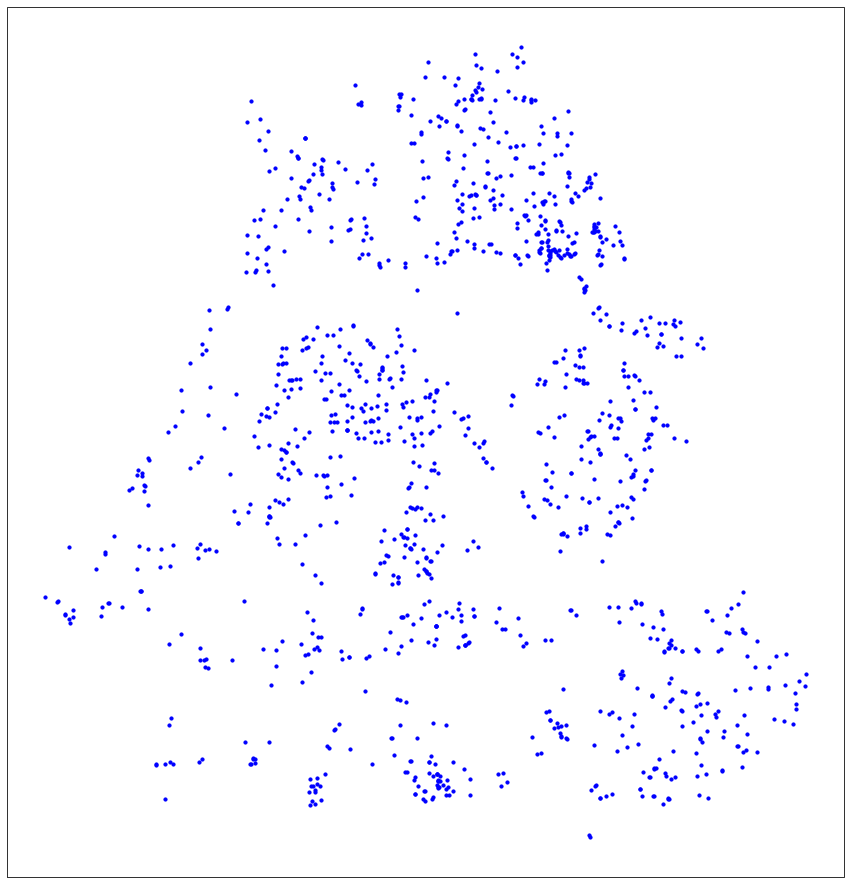

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [12]:
#Se carga la cartografía de Floridablanca
url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

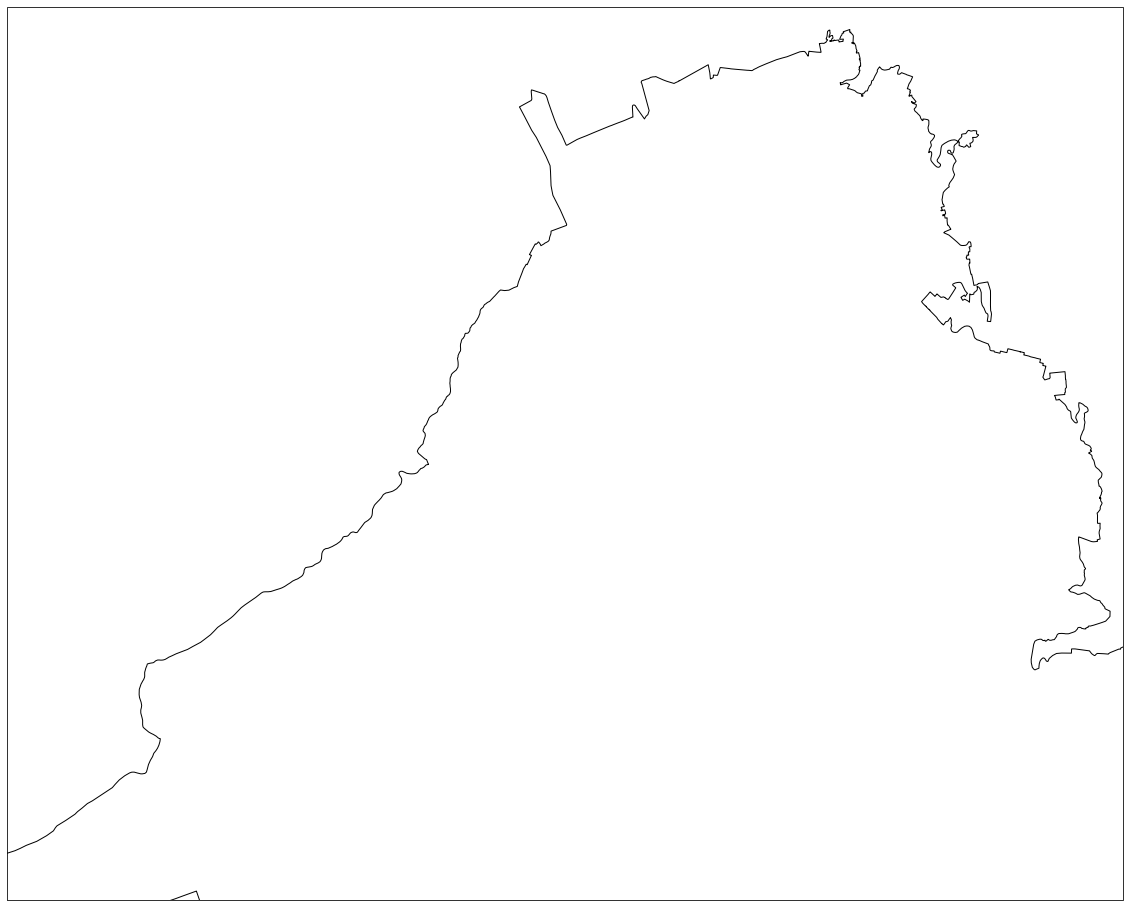

In [13]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)

# Mapa de Floridablanca
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poly in reader.geometries():
    ax.add_geometries([poly], ccrs.PlateCarree(), facecolor='white', edgecolor='black')

plt.show()

In [14]:
#Combinacion de las dos graficas
fdbnc = gpd.read_file("68276_urbano.shp")
fdbnc = fdbnc.to_crs("EPSG:32618")
area_fdbnc = fdbnc.area.sum()
print(f"El área de Floridablanca es {area_fdbnc:.2f} metros cuadrados")


El área de Floridablanca es 17030066.99 metros cuadrados


In [15]:
pointList=[]
for i in range(df.shape[0]):
  pointList.append((df["x"][i],df["y"][i]))

In [16]:
len(pointList)

1262

In [17]:
from shapely.geometry import Point
from shapely.ops import nearest_points
from itertools import combinations

In [18]:
from scipy.spatial.distance import pdist, squareform

coordenadas = np.column_stack((df['x'], df['y']))

dist_matrix = squareform(pdist(coordenadas))

mask = dist_matrix < 100

pairNum = np.sum(mask) // 2 
print(pairNum)

4257


In [19]:
def calcular_distancia(x1, y1, x2, y2):
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

In [20]:
def k_ripley(pointsList,area,h):
  contK=0
  for i in range(len(pointsList)-1):
    for j in range(i+1,len(pointsList)):
      if calcular_distancia(pointsList[i][0],pointsList[i][1],pointsList[j][0],pointsList[j][1])<=h:
        contK+=1
  valorK=contK*area/len(pointsList)**2
  return valorK 
  
k_ripley(pointList,area_fdbnc,100)

38772.64655741063

In [21]:
lower_lon, lower_lat, upper_lon, upper_lat = fdbnc.total_bounds
num_pnts = 1000

random_pnts = []
while len(random_pnts) < num_pnts:
    pnt = [np.random.uniform(upper_lon, lower_lon), np.random.uniform(lower_lat, upper_lat)]
    random_pnts.append(pnt)



In [22]:
def arePointsInShape(polygon, points):
    filtered_pnts = []
    for point in points:
        if polygon.contains(Point(point)):
            filtered_pnts.append(point)
    return filtered_pnts

filtered_pnts = arePointsInShape(fdbnc.geometry[0], random_pnts)

In [23]:
pnts_gdf = gpd.GeoDataFrame(geometry=[Point(point) for point in filtered_pnts])
pnts_gdf['id'] = range(len(pnts_gdf))

<Axes: >

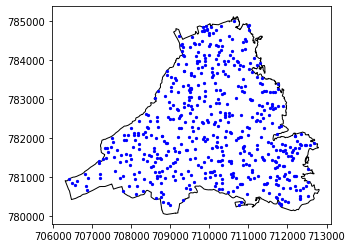

In [24]:
ax = fdbnc.plot(color='white', edgecolor='black')
pnts_gdf.plot(ax=ax, color='blue', markersize=5)

In [25]:
p = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [26]:
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

x_min,y_min = p(lower_lon, lower_lat)
x_max, y_max = p(upper_lon, upper_lat)

In [27]:
x_min,y_min,x_max,y_max

(706552.7316262802, 780796.0652021945, 712059.2439258386, 785242.8333012793)

In [28]:
import shapely.geometry as sg


In [29]:
from shapely.geometry import Polygon
coords = fdbnc.geometry[0]
polygon = Polygon(coords)
ramList=[]
for i in range(9):
    group = []
    i = 0
while i < len(pointList):
    random_easting = np.random.uniform(x_min, x_max)
    random_northing = np.random.uniform(y_min, y_max)
    point = Point(random_easting, random_northing)
    if point.within(polygon):
        group.append((random_easting, random_northing))
        i += 1

ramList.append(group)

In [30]:
df1 = pd.DataFrame(ramList[0], columns=['x', 'y'])

df1['longitud'],df1['latitud']=p(df1['x'],df1['y'],inverse=True)

df1

,x,y,longitud,latitud
0,709746.955496,784244.316719,-73.100965,7.091059
1,708738.501719,781347.801337,-73.110198,7.064909
2,710326.480425,783162.244009,-73.095760,7.081254
3,710009.268616,780847.082409,-73.098716,7.060335
4,709759.424637,781306.356112,-73.100961,7.064496
...,...,...,...,...
1257,710207.779725,781286.224066,-73.096904,7.064298
1258,710041.745286,781161.754728,-73.098411,7.063179
1259,711650.983912,783411.105770,-73.083763,7.083455
1260,709175.785276,781121.240475,-73.106249,7.062844


In [31]:
from pandas.compat import F
dataList=[]
for h in range(10,201,10):
    kReal = k_ripley(pointList,area_fdbnc,h)
    k_list=[]
    for group in ramList:
        k_list.append(k_ripley(group,area_fdbnc,h))
    k_list.append(kReal)
    k_list.sort()

    first_percentile = np.percentile(k_list, 2.5)
    second_percentile = np.percentile(k_list, 97.5)
    dataList.append([h, kReal, first_percentile, second_percentile])

In [32]:
results=pd.DataFrame(dataList,columns=('h','k','first_percentile', 'second_percentile'))
results


,h,k,first_percentile,second_percentile
0,10,1999.582158,216.799616,1953.869785
1,20,3977.778411,839.664112,3897.313942
2,30,6469.236395,1913.236565,6352.415886
3,40,9516.727919,3334.329981,9358.204895
4,50,13237.875466,4991.203005,13026.422326
5,60,17718.222655,7104.932434,17446.087008
6,70,22679.752716,9366.224610,22338.380200
7,80,27726.826399,12077.957419,27325.573348
8,90,33041.223900,15088.290933,32580.892286
9,100,38772.646557,18536.500861,38253.771027


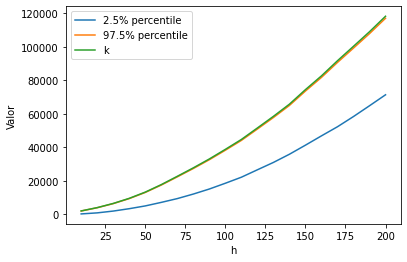

In [37]:
df = pd.DataFrame(dataList, columns=['h', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(df['h'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['h'], df['percentile_97_5'], label='97.5% percentile')
plt.plot(df['h'], df['k'], label='k')

plt.xlabel('h')
plt.ylabel('Valor')
plt.legend()
plt.show()